In [4]:
# Initialize model training environment
import sys
sys.path.append('../src')

from model_training import (
    load_data,
    prepare_data_for_modeling,
    train_random_forest,
    train_xgboost,
    train_catboost,
    train_lightgbm,
    train_extra_trees,
    train_linear_models,
    evaluate_all_models,
    save_best_model,
    visualize_results,
    create_validation_visualizations
)

# Define modeling target
ticker = input("Enter the ticker symbol to analyze (or press Enter to use AAPL): ").upper() or "AAPL"
print(f"Model training and selection for {ticker}")
print("Evaluating multiple algorithm families for optimal predictive performance")

Analyzing data for AAPL


In [5]:

# Load engineered features and validation data
df_mod, df_val_mod = load_data(ticker)

# Prepare datasets for model training with proper temporal splits
X_train_mod, X_test_mod, y_train_mod, y_test_mod, X_val_mod, y_val_mod, feature_columns_mod, dates_mod = prepare_data_for_modeling(df_mod, df_val_mod)

print(f"Training set: {X_train_mod.shape[0]} observations")
print(f"Test set: {X_test_mod.shape[0]} observations") 
print(f"Validation set: {X_val_mod.shape[0]} observations")
print(f"Feature dimensions: {X_train_mod.shape[1]} engineered features")

# Initialize model evaluation framework
model_results_mod = {}

Model Training Step-by-Step with Modular Functions for AAPL
Step 1: Loading data...
Loading data...
Data shape: (451, 32)
Date range: 2023-09-01 00:00:00 to 2025-06-20 00:00:00
Loading validation data...
Validation data shape: (35, 33)
Step 2: Preparing data for modeling...
Preparing data for modeling...
Training set: 360 samples
Test set: 91 samples
Number of features: 30
Data preparation complete.


In [6]:
# Train ensemble models with hyperparameter optimization
print("Training Random Forest with feature importance analysis...")
rf_model_mod, rf_train_pred_mod, rf_test_pred_mod, rf_val_pred_mod, rf_metrics_mod = train_random_forest(
    X_train_mod, y_train_mod, X_test_mod, y_test_mod, X_val_mod, y_val_mod
)
model_results_mod['Random Forest'] = {
    'model': rf_model_mod, 'train_pred': rf_train_pred_mod, 'test_pred': rf_test_pred_mod,
    'val_pred': rf_val_pred_mod, 'metrics': rf_metrics_mod
}

print("Training XGBoost with gradient boosting optimization...")
xgb_model_mod, xgb_train_pred_mod, xgb_test_pred_mod, xgb_val_pred_mod, xgb_metrics_mod = train_xgboost(
    X_train_mod, y_train_mod, X_test_mod, y_test_mod, X_val_mod, y_val_mod
)
model_results_mod['XGBoost'] = {
    'model': xgb_model_mod, 'train_pred': xgb_train_pred_mod, 'test_pred': xgb_test_pred_mod,
    'val_pred': xgb_val_pred_mod, 'metrics': xgb_metrics_mod
}

print("Training CatBoost with categorical feature handling...")
cat_model_mod, cat_train_pred_mod, cat_test_pred_mod, cat_val_pred_mod, cat_metrics_mod = train_catboost(
    X_train_mod, y_train_mod, X_test_mod, y_test_mod, X_val_mod, y_val_mod
)
model_results_mod['CatBoost'] = {
    'model': cat_model_mod, 'train_pred': cat_train_pred_mod, 'test_pred': cat_test_pred_mod,
    'val_pred': cat_val_pred_mod, 'metrics': cat_metrics_mod
}

print("Training LightGBM with efficient gradient boosting...")
lgb_model_mod, lgb_train_pred_mod, lgb_test_pred_mod, lgb_val_pred_mod, lgb_metrics_mod = train_lightgbm(
    X_train_mod, y_train_mod, X_test_mod, y_test_mod, X_val_mod, y_val_mod
)
model_results_mod['LightGBM'] = {
    'model': lgb_model_mod, 'train_pred': lgb_train_pred_mod, 'test_pred': lgb_test_pred_mod,
    'val_pred': lgb_val_pred_mod, 'metrics': lgb_metrics_mod
}

print("Training Extra Trees with randomized ensemble approach...")
et_model_mod, et_train_pred_mod, et_test_pred_mod, et_val_pred_mod, et_metrics_mod = train_extra_trees(
    X_train_mod, y_train_mod, X_test_mod, y_test_mod, X_val_mod, y_val_mod
)
model_results_mod['Extra Trees'] = {
    'model': et_model_mod, 'train_pred': et_train_pred_mod, 'test_pred': et_test_pred_mod,
    'val_pred': et_val_pred_mod, 'metrics': et_metrics_mod
}

# Train linear models with regularization
print("Training regularized linear models for baseline comparison...")
linear_models_mod = train_linear_models(X_train_mod, y_train_mod, X_test_mod, y_test_mod, X_val_mod, y_val_mod)
model_results_mod.update(linear_models_mod)



Step 3: Training Random Forest...
Training Random Forest...
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Random Forest Train MSE: 0.3747
Random Forest Test MSE: 104.6255
Random Forest Validation MSE: 112.5289

Step 4: Training XGBoost...
Training XGBoost...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
XGBoost Train MSE: 0.2650
XGBoost Test MSE: 16.9159
XGBoost Validation MSE: 45.2674

Step 5: Training CatBoost...
Training CatBoost...
Fitting 10 folds for each of 50 candidates, totalling 500 fits
CatBoost Train MSE: 0.6348
CatBoost Test MSE: 18.1319
CatBoost Validation MSE: 52.7324

Step 6: Training LightGBM...
Training LightGBM...
LightGBM Train MSE: 0.5216
LightGBM Test MSE: 17.8432
LightGBM Validation MSE: 41.5997

Step 7: Training Extra Trees...
Training Extra Trees Regressor...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Extra Trees Regressor Train MSE: 11.6522
Extra Trees Regressor Test MSE: 184.5081
Extra Trees Regressor

In [ ]:
# Evaluate all models and select optimal performer
print("Evaluating model performance across all algorithms...")
best_model_name, performance_summary = evaluate_all_models(model_results_mod)

print(f"Model evaluation completed for {len(model_results_mod)} algorithms")
print(f"Optimal model selected: {best_model_name}")
print("Selection based on validation set performance to ensure robustness")

# Save optimal model for prediction pipeline
save_best_model(ticker, model_results_mod, best_model_name, feature_columns_mod)
print(f"Optimal model saved for {ticker}")
print("Model training and selection pipeline completed")
print("Ready for forward-looking price prediction phase")


Step 9: Evaluating all models...
MODEL EVALUATION

Random Forest:
  Train MSE: 0.3747 | Test MSE: 104.6255 | Val MSE: 112.5289
  Train MAE: 0.4422 | Test MAE: 8.6355 | Val MAE: 9.0283
  Train R²:  0.9994 | Test R²:  0.6330 | Val R²:  0.5867

XGBoost:
  Train MSE: 0.2650 | Test MSE: 16.9159 | Val MSE: 45.2674
  Train MAE: 0.3881 | Test MAE: 3.1864 | Val MAE: 5.4685
  Train R²:  0.9996 | Test R²:  0.9407 | Val R²:  0.8337

CatBoost:
  Train MSE: 0.6348 | Test MSE: 18.1319 | Val MSE: 52.7324
  Train MAE: 0.6088 | Test MAE: 3.4707 | Val MAE: 5.9291
  Train R²:  0.9990 | Test R²:  0.9364 | Val R²:  0.8063

LightGBM:
  Train MSE: 0.5216 | Test MSE: 17.8432 | Val MSE: 41.5997
  Train MAE: 0.5385 | Test MAE: 3.2607 | Val MAE: 5.3616
  Train R²:  0.9992 | Test R²:  0.9374 | Val R²:  0.8472

Extra Trees:
  Train MSE: 11.6522 | Test MSE: 184.5081 | Val MSE: 171.8145
  Train MAE: 2.8211 | Test MAE: 11.9857 | Val MAE: 11.5055
  Train R²:  0.9823 | Test R²:  0.3528 | Val R²:  0.3689

Ridge:
  Train 

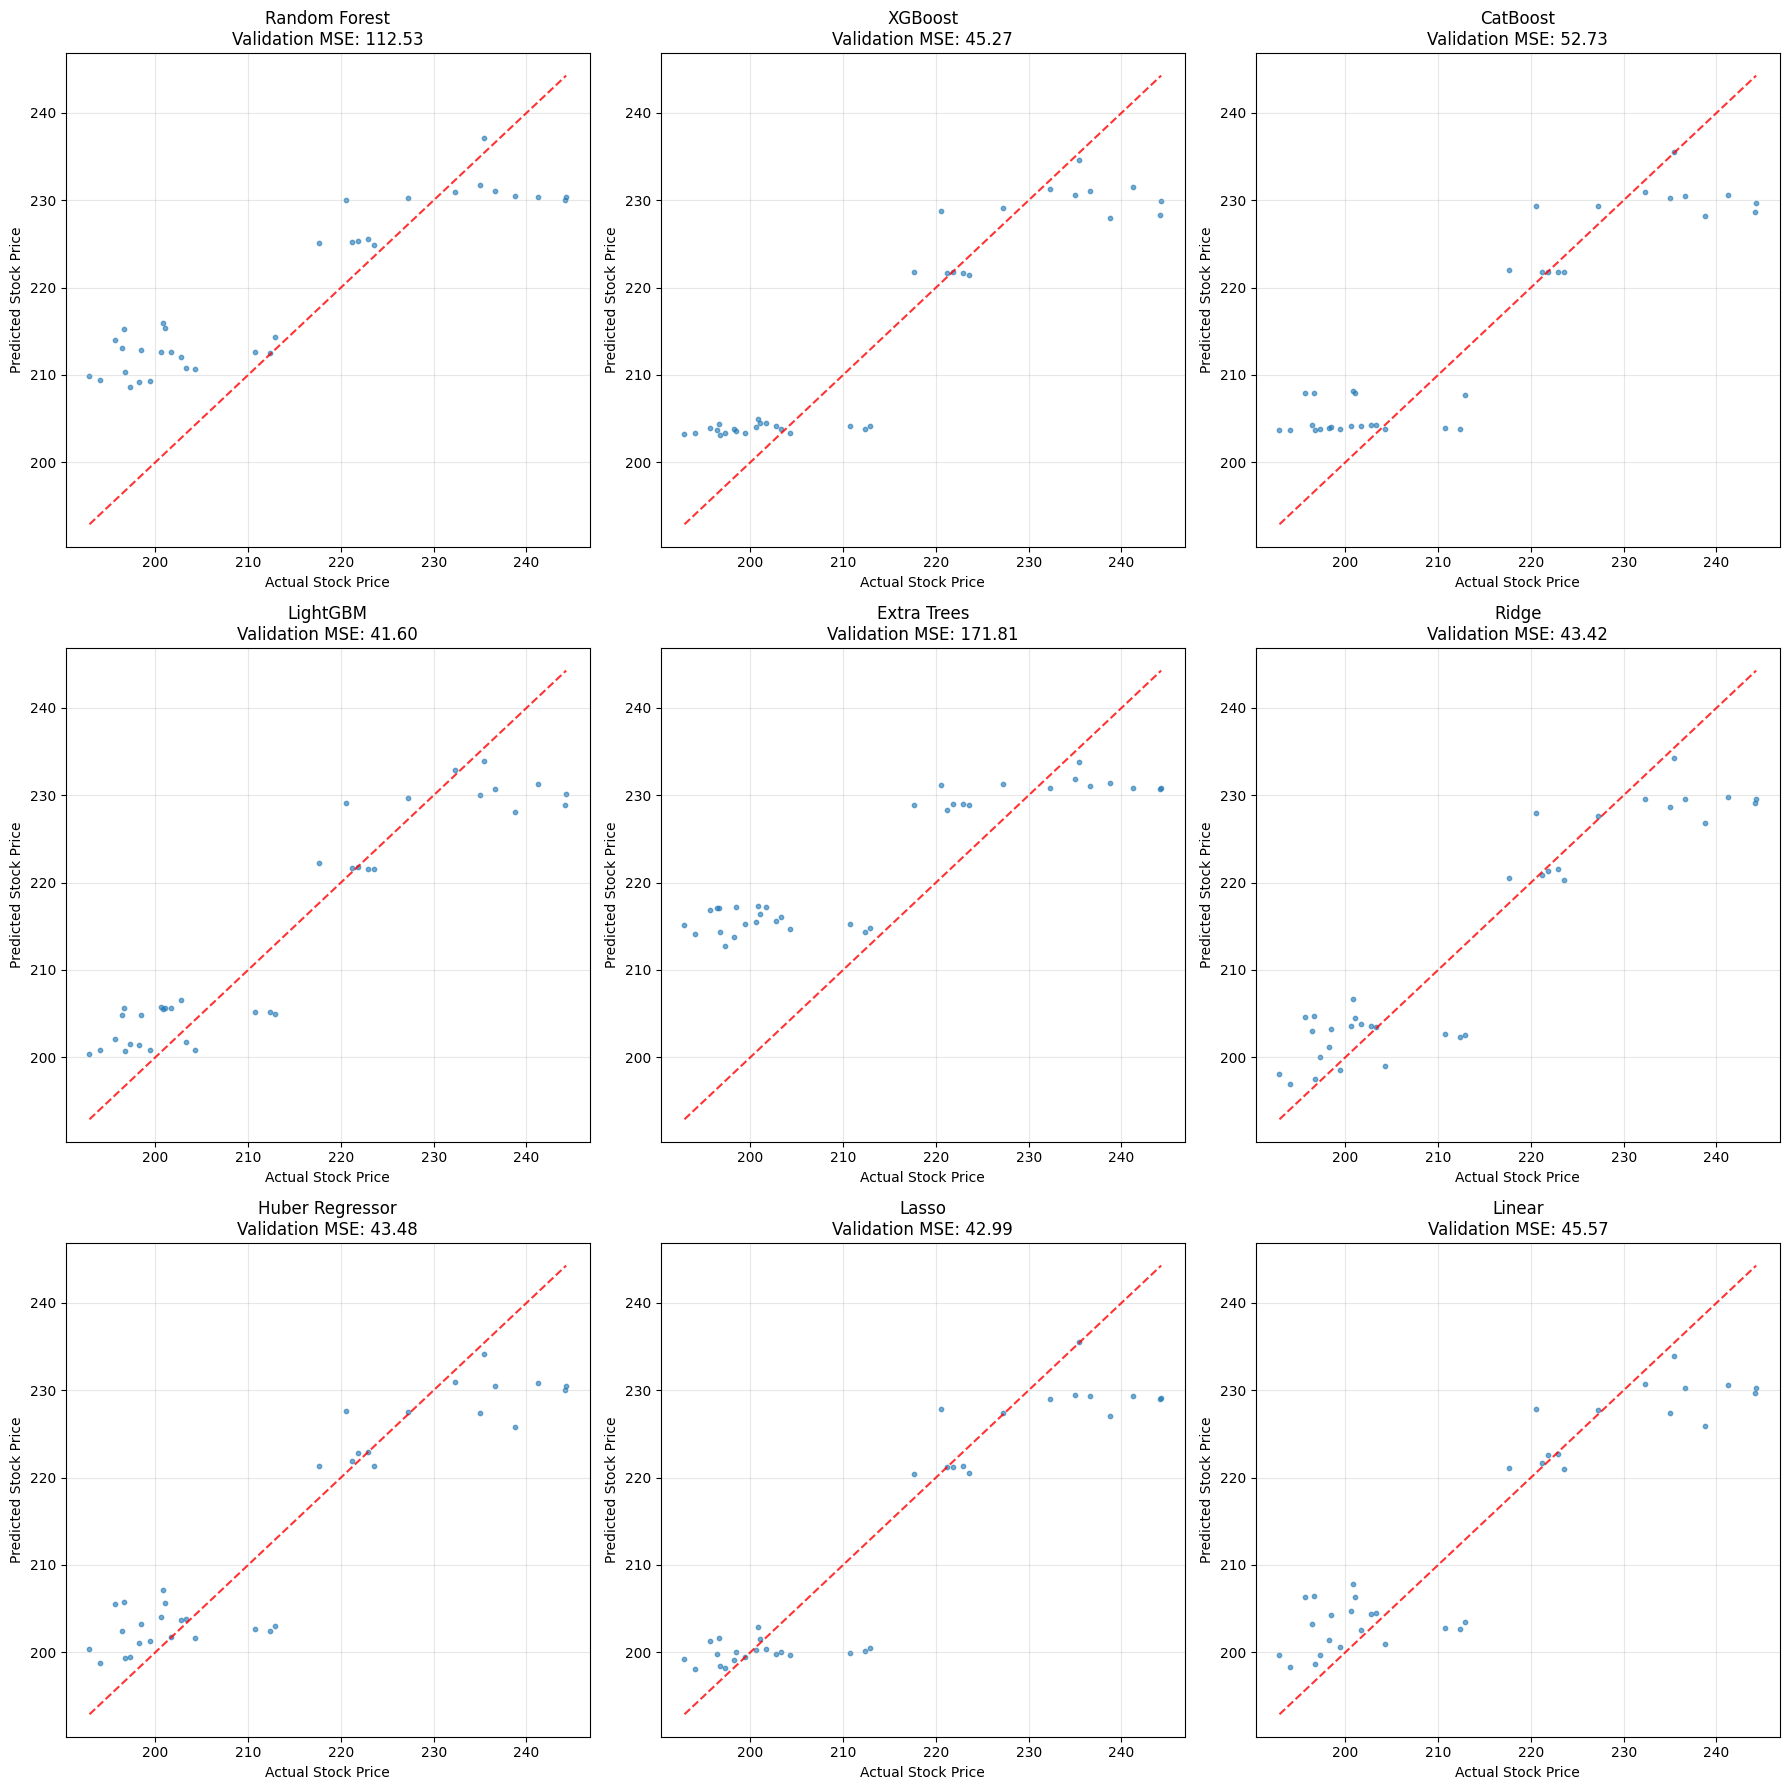

Creating validation visualizations...


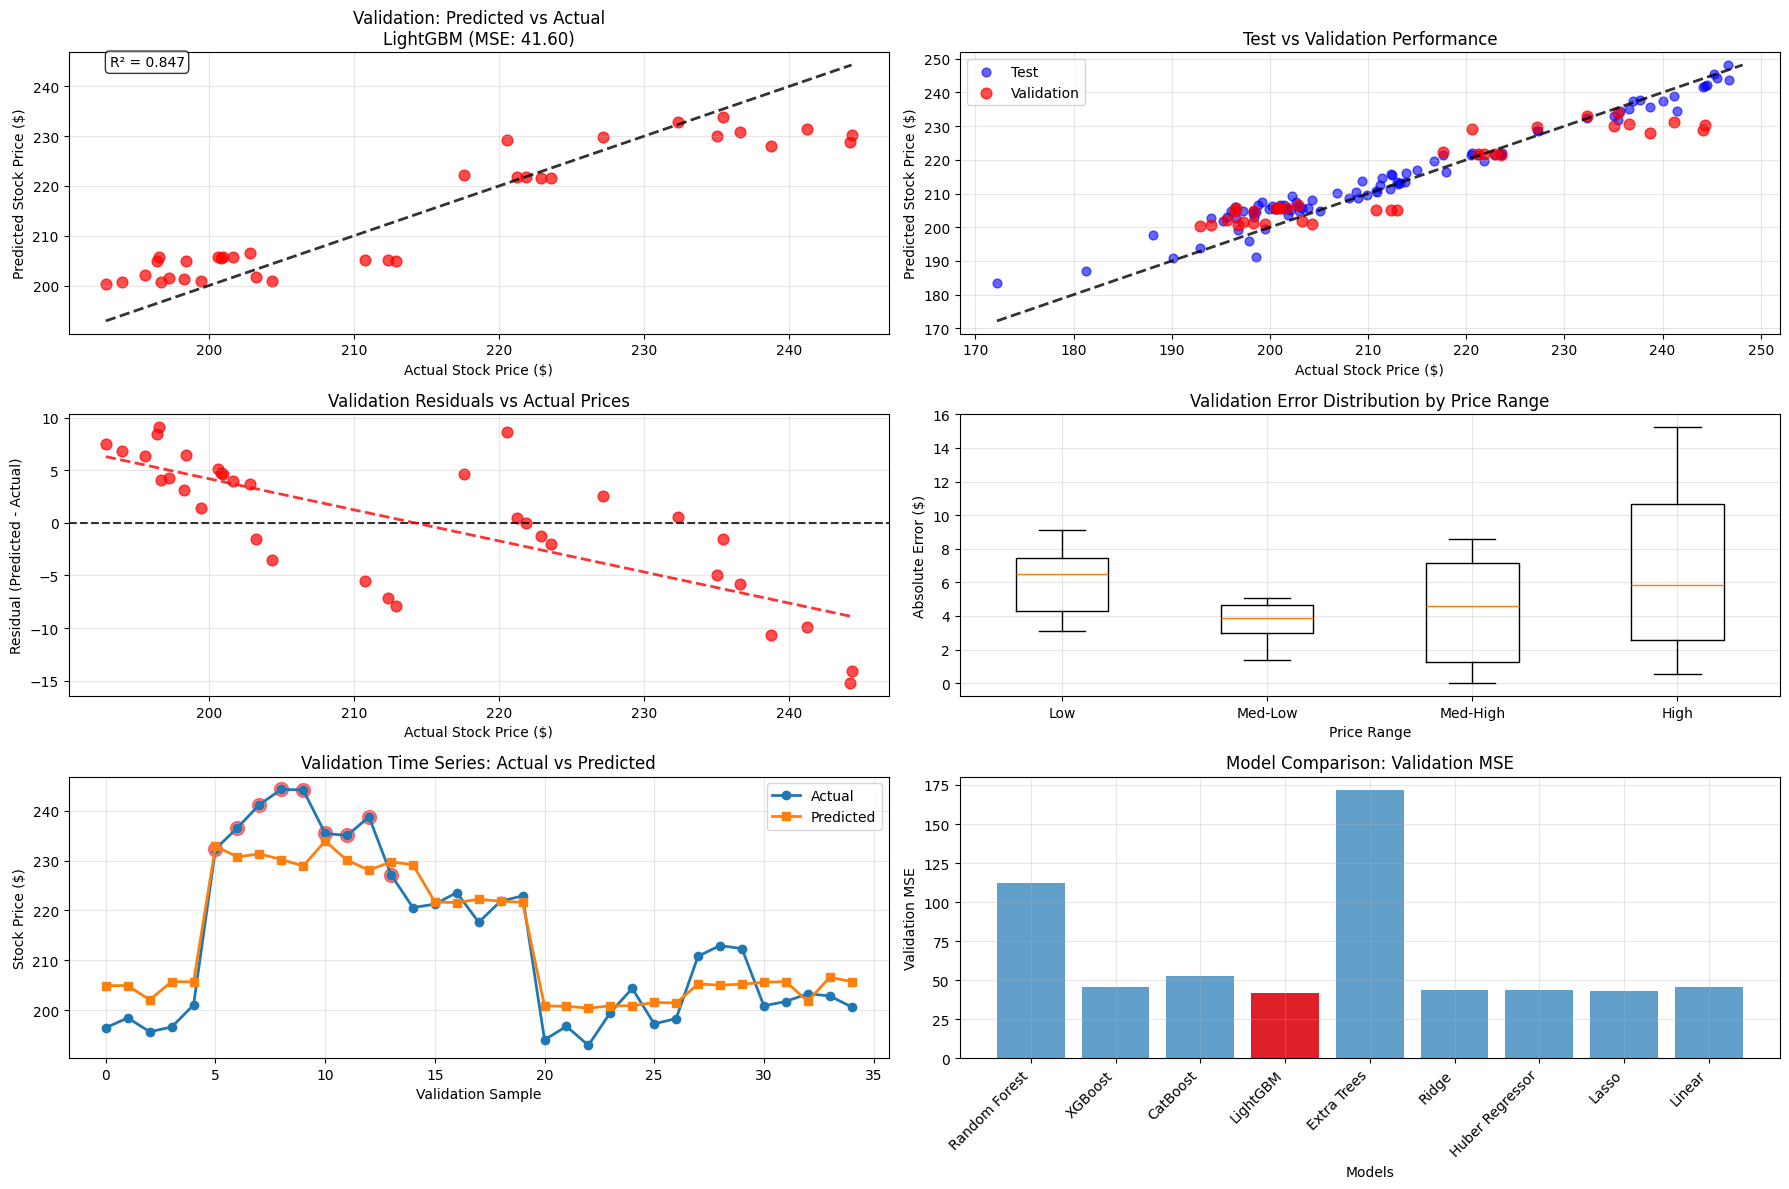

💾 Step 11: Saving best model...

SAVING BEST MODEL
Available models for selection:
  Random Forest: MSE = 112.5289
  XGBoost: MSE = 45.2674
  CatBoost: MSE = 52.7324
  LightGBM: MSE = 41.5997
  Extra Trees: MSE = 171.8145
  Ridge: MSE = 43.4214
  Huber Regressor: MSE = 43.4810
  Lasso: MSE = 42.9920
  Linear: MSE = 45.5675

Best model selected: LightGBM
Best Val MSE: 41.5997
Extracting best estimator from RandomizedSearchCV
✅ Model saved: LGBMRegressor
✅ Model metadata saved

Ready to run prediction notebook!
✅ Modular Model Training Pipeline Completed Successfully!
Best model saved for AAPL
Ready to proceed with prediction pipeline!


In [7]:
# Step 9: Evaluate All Models
print("Step 9: Evaluating all models...")
results_df_mod = evaluate_all_models(model_results_mod, y_train_mod, y_test_mod, y_val_mod)

# Step 10: Create Visualizations
print("Step 10: Creating visualizations...")

# Create models dictionary for visualization (matching notebook format)
models_for_viz = {}
for name, results in model_results_mod.items():
    if 'metrics' in results:
        # Tree models
        models_for_viz[name] = (results['train_pred'], results['test_pred'], results['val_pred'], results['metrics']['val_mse'])
    else:
        # Linear models
        models_for_viz[name] = (results['train_pred'], results['test_pred'], results['val_pred'], results['metrics']['val_mse'])

# Visualize results
visualize_results(models_for_viz, y_val_mod)

# Create validation visualizations
create_validation_visualizations(models_for_viz, y_test_mod, y_val_mod, results_df_mod)

# Step 11: Save Best Model
print("Step 11: Saving best model...")
save_best_model(model_results_mod, results_df_mod, feature_columns_mod, ticker)

print("✅ Model Training Completed Successfully!")
print(f"Best model saved for {ticker}")
print("Ready to proceed with prediction pipeline!")